In [67]:
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Estimating $\pi$ with Monte Carlo

The area of a unit circle is equal to $\pi$ => $\pi r^2 = \pi \text{ for } r=1$ 



In [27]:
def get_pi_estimate(n_samples):
    N_SAMPLES = n_samples
    sums = (np.random.rand(n_samples, 2)**2).sum(axis=1)
    return 4 * (sums < 1).sum() / n_samples

In [87]:
# Get estimates
n_samples = [10, 20, 50, 100, 500, 1000, 10000, 100000]

results = np.zeros((len(n_samples), 2))

for idx, n in tqdm(enumerate(n_samples)):
    local_results = []
    for i in range(100):
        local_results.append(get_pi_estimate(n))
    local_result = np.array(local_results)
    results[idx] = local_result.mean(), local_result.std()

8it [00:00, 12.73it/s]


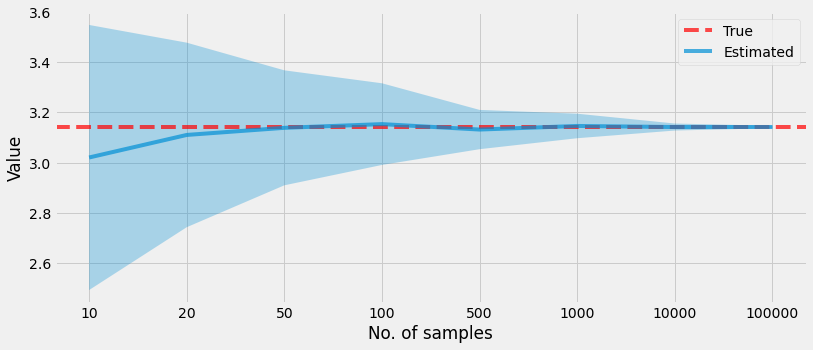

In [90]:
plt.figure(figsize=(12, 5))

means = results[:, 0]
sds = results[:, 1]

plt.axhline(np.pi, ls='--', color='red', label='True', alpha=.7)

plt.plot(means, label='Estimated', alpha=.7)
plt.fill_between(np.arange(len(means)), means - sds, means + sds, alpha=.3)

plt.xticks(ticks=np.arange(len(means)), labels=n_samples)
plt.xlabel('No. of samples')
plt.ylabel('Value')
plt.legend()

plt.show()